In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import plotly.express as px


In [ ]:
# Load the datasets from Excel files
co2_data = pd.read_excel("CO2-Dataset.xlsx")
population_data = pd.read_excel("Population-Dataset.xlsx")
gdp_data = pd.read_excel("GDP-Dataset.xlsx")
energy_data = pd.read_excel("Energy-Dataset.xlsx")


In [ ]:

# Check and print the column names for each dataset
print("Population Data Columns:", population_data.columns.tolist())
print("GDP Data Columns:", gdp_data.columns.tolist())
print("Energy Data Columns:", energy_data.columns.tolist())
print("CO2 Data Columns:", co2_data.columns.tolist())



Population Data Columns: ['Country', 'Year', 'Population Total']
GDP Data Columns: ['country', 'year', 'current GDP']
Energy Data Columns: ['Country', 'year', 'Energy use (kg of oil equivalent per capita)']
CO2 Data Columns: ['Country Name', 'Country Code', 'Region', 'Year', 'CO2 (kt)']


In [ ]:
# Strip any whitespace from column names
co2_data.columns = co2_data.columns.str.strip()
population_data.columns = population_data.columns.str.strip()
gdp_data.columns = gdp_data.columns.str.strip()
energy_data.columns = energy_data.columns.str.strip()

In [ ]:
# Rename GDP columns for consistency
gdp_data = gdp_data.rename(columns={
    'country': 'Country',
    'current GDP': 'GDP'
})

In [ ]:
# Define BRICS and G7 countries
brics_countries = ['Brazil', 'Russia', 'India', 'China', 'South Africa']
g7_countries = ['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom', 'United States']
selected_countries = brics_countries + g7_countries


In [ ]:

# Filter datasets for selected countries
co2_data = co2_data[co2_data['Country Name'].isin(selected_countries)]
population_data = population_data[population_data['Country'].isin(selected_countries)]
gdp_data = gdp_data[gdp_data['Country'].isin(selected_countries)]
energy_data = energy_data[energy_data['Country'].isin(selected_countries)]


In [ ]:

# Check the latest year in each dataset
latest_co2_year = co2_data['Year'].max()
latest_population_year = population_data['Year'].max()
latest_gdp_year = gdp_data['year'].max()
latest_energy_year = energy_data['year'].max()


In [ ]:

# Filter datasets for the latest year
latest_co2_data = co2_data[co2_data['Year'] == latest_co2_year]
latest_population_data = population_data[population_data['Year'] == latest_population_year]
latest_gdp_data = gdp_data[gdp_data['year'] == latest_gdp_year]
latest_energy_data = energy_data[energy_data['year'] == latest_energy_year]


In [ ]:

# Merge datasets on 'Country Name' for analysis
latest_data = latest_co2_data.merge(latest_population_data, left_on='Country Name', right_on='Country', how='outer')
latest_data = latest_data.merge(latest_gdp_data, left_on='Country Name', right_on='Country', how='outer')
latest_data = latest_data.merge(latest_energy_data, left_on='Country Name', right_on='Country', how='outer')



In [ ]:
# Check for missing values and fill if necessary
latest_data.fillna(0, inplace=True)

# Convert GDP to trillion dollars only if the original data is in billions.
latest_data['GDP'] = latest_data['GDP'] / 1e2 # Convert from billion to trillion USD

# Check the conversion:
print(latest_data[['Country Name', 'GDP']])


      Country Name           GDP
0           Brazil  1.802210e+10
1           Canada  1.556130e+10
2            China  1.106160e+11
3           France  2.438210e+10
4          Germany  3.356240e+10
5            India  2.103590e+10
6            Italy  1.835900e+10
7            Japan  4.389480e+10
8     South Africa  3.176210e+09
9   United Kingdom  2.928590e+10
10   United States  1.822470e+11


In [ ]:

# Function to plot data for a given dataset
def plot_country_data(dataset, title, x_col, y_col, y_label):
    plt.figure(figsize=(12, 6))
    for country in dataset['Country'].unique():
        subset = dataset[dataset['Country'] == country]
        plt.plot(subset[x_col], subset[y_col], marker='o', label=country)

    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel(y_label)
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:

# Population Analysis with appropriate unit conversions
def plot_population_data(dataset, title, x_col, y_col, is_billion=False):
    plt.figure(figsize=(12, 6))
    for country in dataset['Country'].unique():
        subset = dataset[dataset['Country'] == country]
        plt.plot(subset[x_col], subset[y_col] / (1e9 if is_billion else 1e6), marker='o', label=country)

    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel('Population (in billions)' if is_billion else 'Population (in millions)')
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
# Function for GDP analysis in trillions of dollars

def plot_gdp_data(dataset, title, x_col, y_col):
    plt.figure(figsize=(12, 6))

    # Plot the GDP data for each country
    for country in dataset['Country'].unique():
        subset = dataset[dataset['Country'] == country]
        plt.plot(subset[x_col], subset[y_col] / 1e12, marker='o', label=country)  # Convert to trillions

    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel('GDP (in trillions of USD)')
    plt.legend()
    plt.grid()

    # Format Y-axis to show values as whole numbers in trillions
    ax = plt.gca()
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.0f}'))

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



In [ ]:
# Function for CO2 emissions analysis
def plot_co2_data(dataset, title, x_col, y_col):
    plt.figure(figsize=(12, 6))
    for country in dataset['Country Name'].unique():
        subset = dataset[dataset['Country Name'] == country]
        plt.plot(subset[x_col], subset[y_col], marker='o', label=country)

    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel('CO2 Emissions (kt)')
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

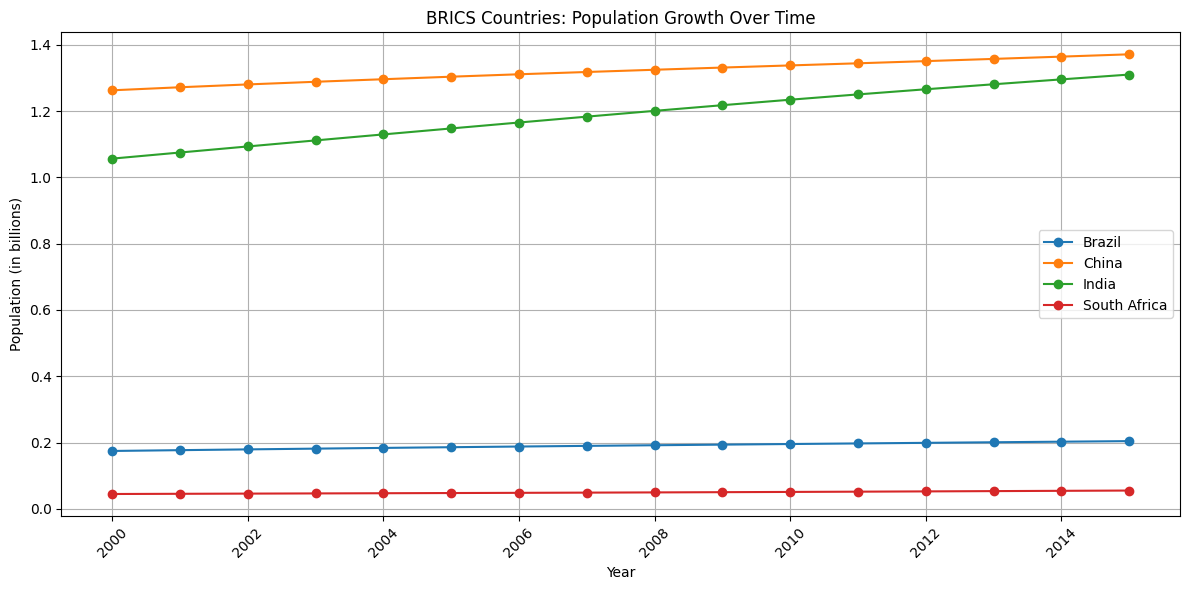

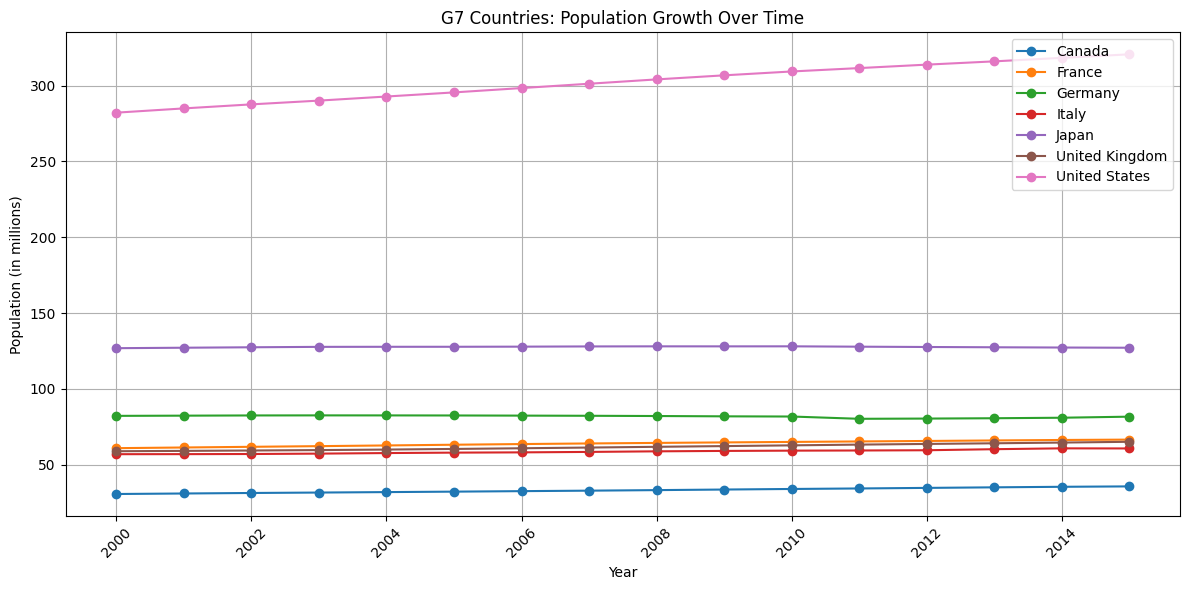

In [ ]:
# Population analysis for BRICS (in billions)
plot_population_data(population_data[population_data['Country'].isin(brics_countries)],
                      'BRICS Countries: Population Growth Over Time', 'Year', 'Population Total', is_billion=True)

# Population analysis for G7 (in millions)
plot_population_data(population_data[population_data['Country'].isin(g7_countries)],
                      'G7 Countries: Population Growth Over Time', 'Year', 'Population Total', is_billion=False)


# Population Map Visualization
fig_population = px.choropleth(latest_data,
                                locations='Country Name',
                                locationmode='country names',
                                color='Population Total',
                                hover_name='Country Name',
                                title=f'World Population in {latest_population_year} (BRICS & G7)',
                                color_continuous_scale=px.colors.sequential.Plasma)

fig_population.show()

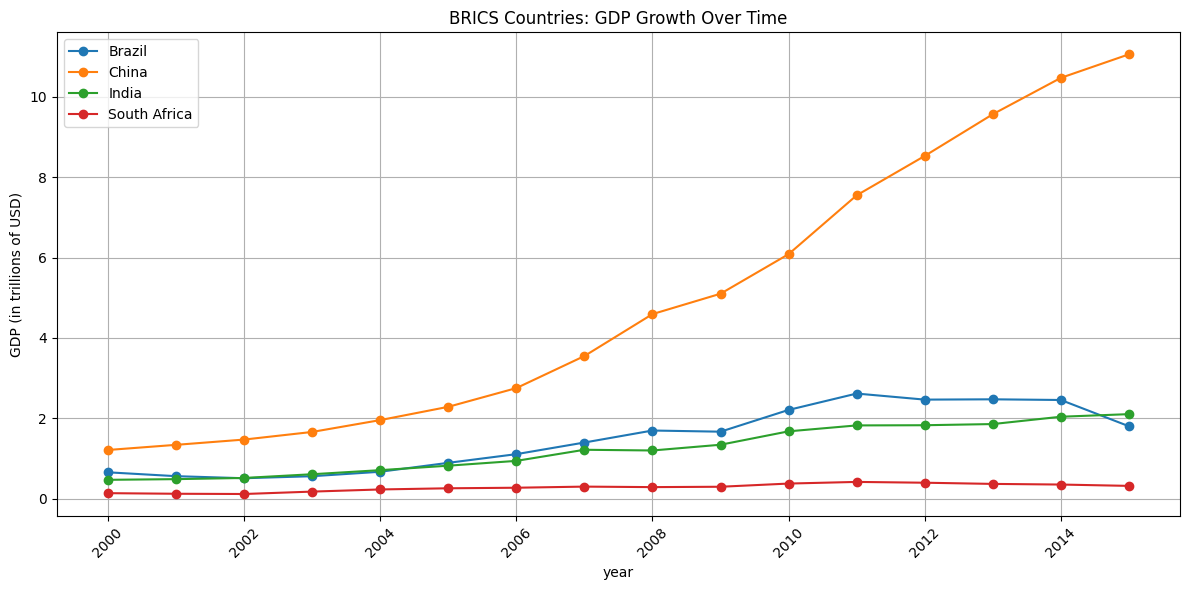

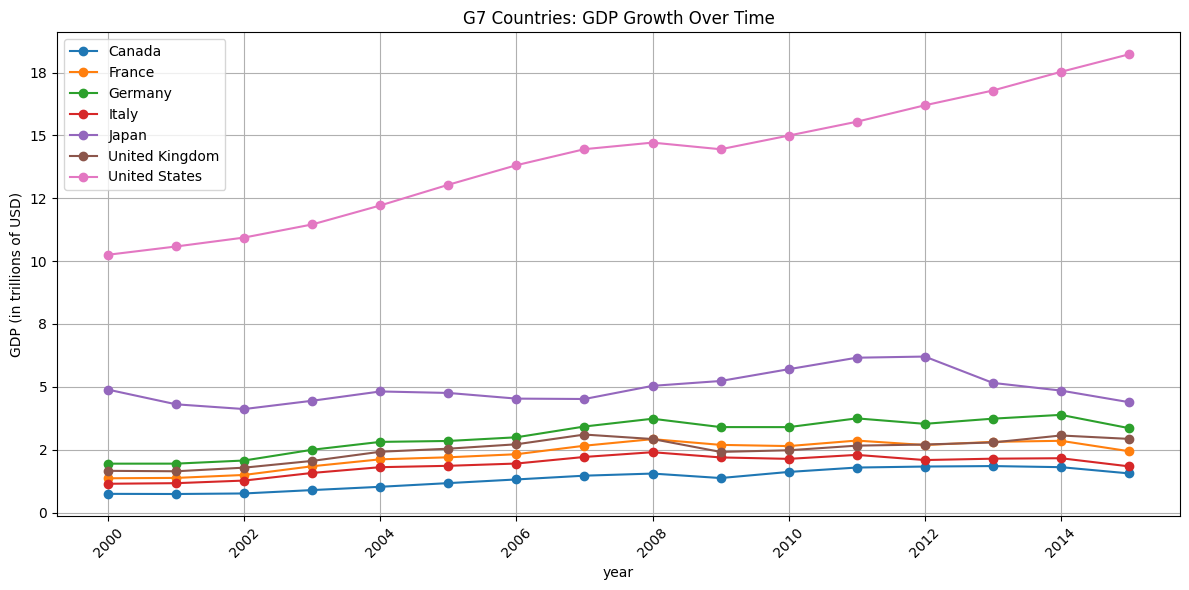

In [ ]:
# GDP Analysis
plot_gdp_data(gdp_data[gdp_data['Country'].isin(brics_countries)],
               'BRICS Countries: GDP Growth Over Time', 'year', 'GDP')
plot_gdp_data(gdp_data[gdp_data['Country'].isin(g7_countries)],
               'G7 Countries: GDP Growth Over Time', 'year', 'GDP')


# 5. GDP Map Visualization
fig_gdp = px.choropleth(latest_data,
                         locations='Country Name',
                         locationmode='country names',
                         color='GDP',
                         hover_name='Country Name',
                         title=f'World GDP in {latest_gdp_year} (BRICS & G7)',
                         color_continuous_scale=px.colors.sequential.Plasma)
fig_gdp.show()


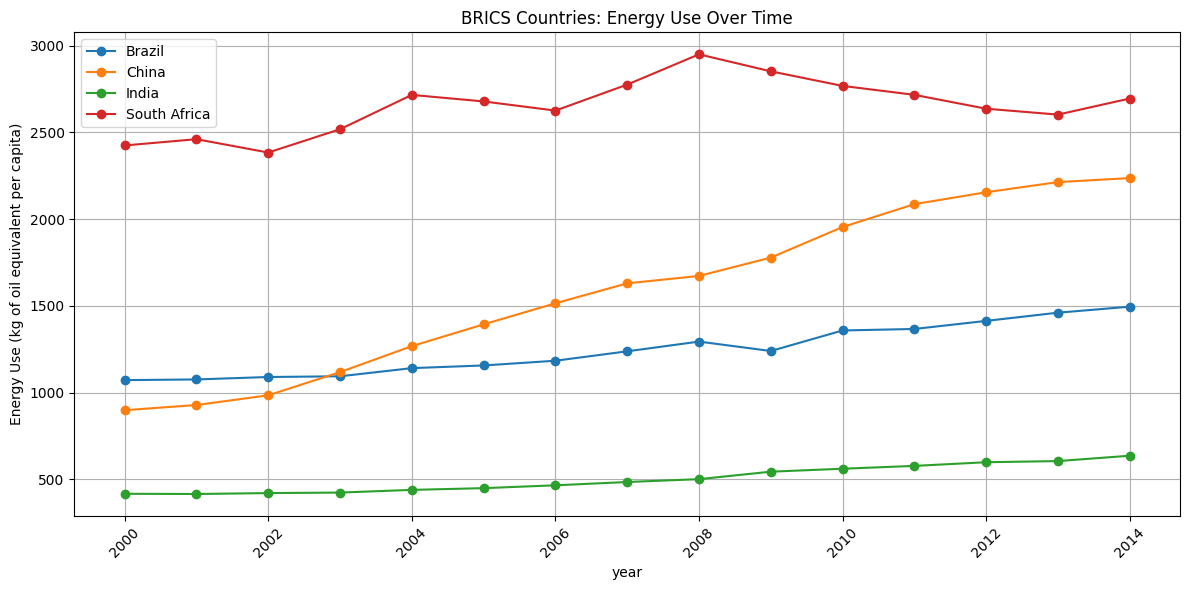

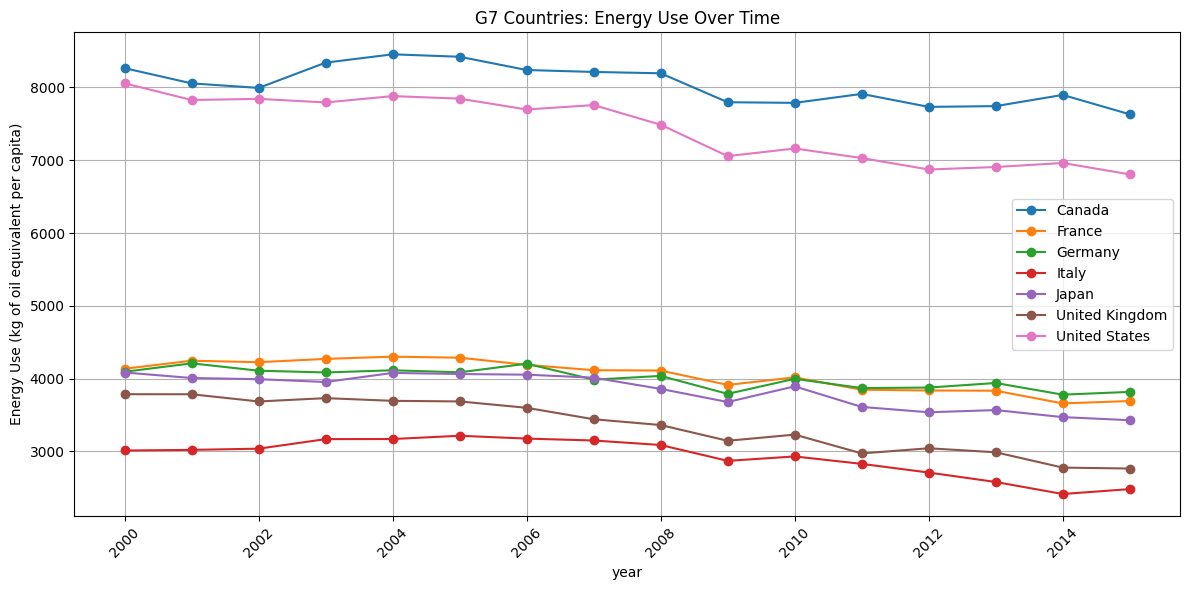

In [ ]:
# Energy Use Analysis
plot_country_data(energy_data[energy_data['Country'].isin(brics_countries)],
                    'BRICS Countries: Energy Use Over Time', 'year', 'Energy use (kg of oil equivalent per capita)',
                    'Energy Use (kg of oil equivalent per capita)')
plot_country_data(energy_data[energy_data['Country'].isin(g7_countries)],
                    'G7 Countries: Energy Use Over Time', 'year', 'Energy use (kg of oil equivalent per capita)',
                    'Energy Use (kg of oil equivalent per capita)')



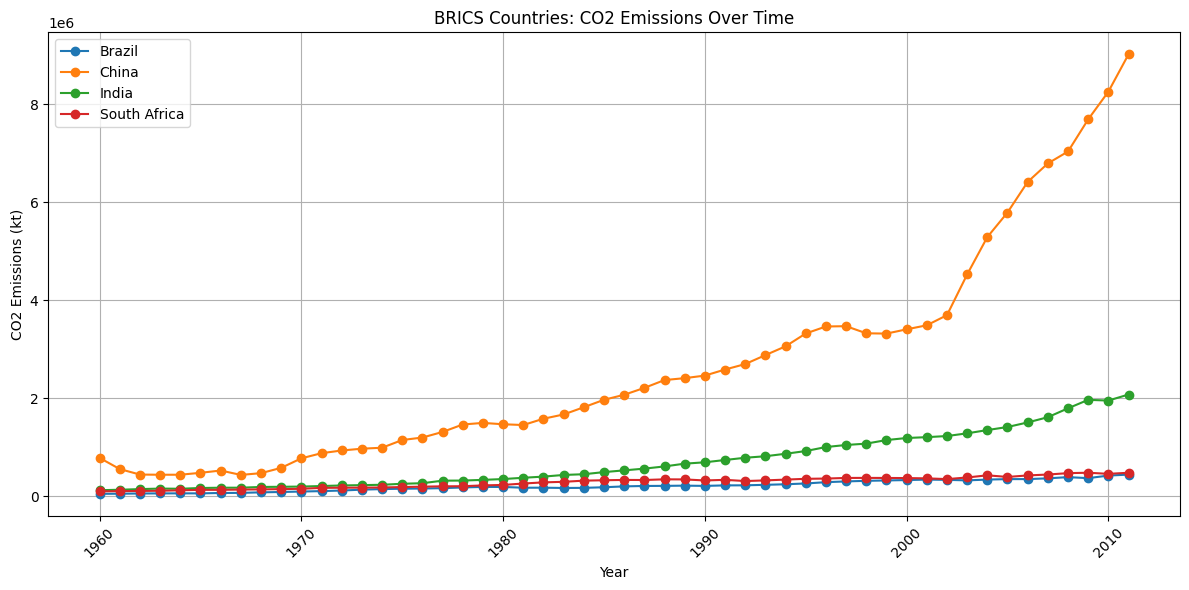

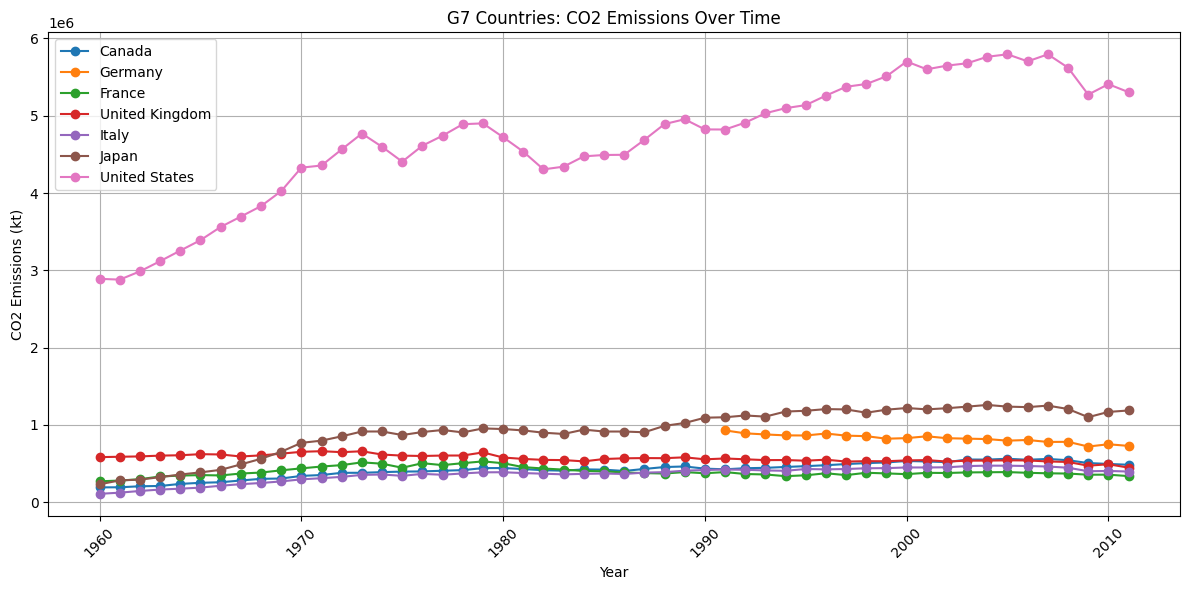

In [ ]:
# CO2 Emissions Analysis
plot_co2_data(co2_data[co2_data['Country Name'].isin(brics_countries)],
                'BRICS Countries: CO2 Emissions Over Time', 'Year', 'CO2 (kt)')
plot_co2_data(co2_data[co2_data['Country Name'].isin(g7_countries)],
                'G7 Countries: CO2 Emissions Over Time', 'Year', 'CO2 (kt)')

# 6. CO2 Map Visualization
fig_co2 = px.choropleth(latest_data,
                         locations='Country Name',
                         locationmode='country names',
                         color='CO2 (kt)',
                         hover_name='Country Name',
                         title=f'World CO2 Emissions in {latest_co2_year} (BRICS & G7)',
                         color_continuous_scale=px.colors.sequential.Plasma)

fig_co2.show()


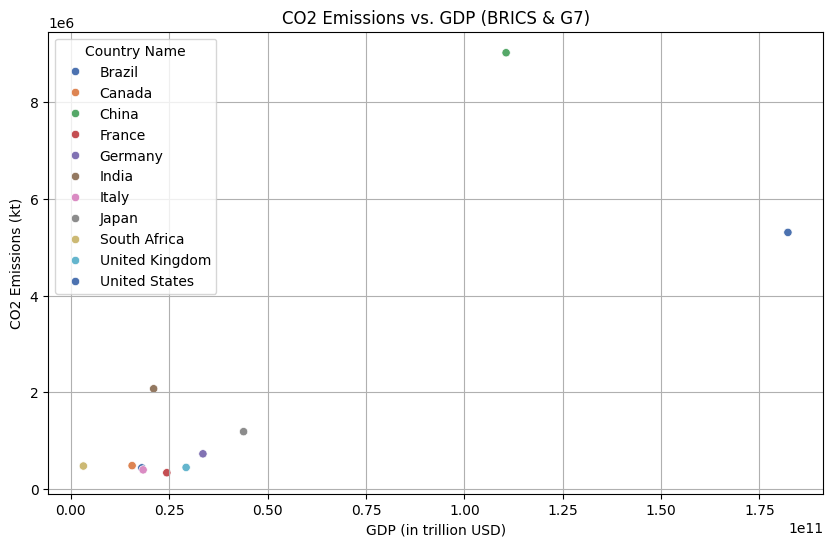

In [ ]:
# 1. Plot CO2 Emissions vs. GDP
plt.figure(figsize=(10, 6))
sns.scatterplot(data=latest_data, x='GDP', y='CO2 (kt)', hue='Country Name', palette='deep')
plt.title('CO2 Emissions vs. GDP (BRICS & G7)')
plt.xlabel('GDP (in trillion USD)')
plt.ylabel('CO2 Emissions (kt)')
plt.grid()
plt.show()


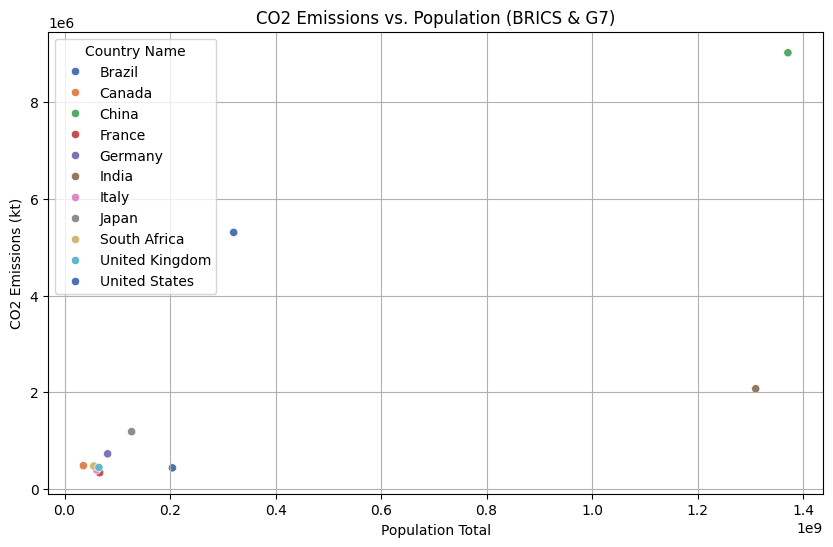

In [ ]:
# 2. Plot CO2 Emissions vs. Population
plt.figure(figsize=(10, 6))
sns.scatterplot(data=latest_data, x='Population Total', y='CO2 (kt)', hue='Country Name', palette='deep')
plt.title('CO2 Emissions vs. Population (BRICS & G7)')
plt.xlabel('Population Total')
plt.ylabel('CO2 Emissions (kt)')
plt.grid()
plt.show()


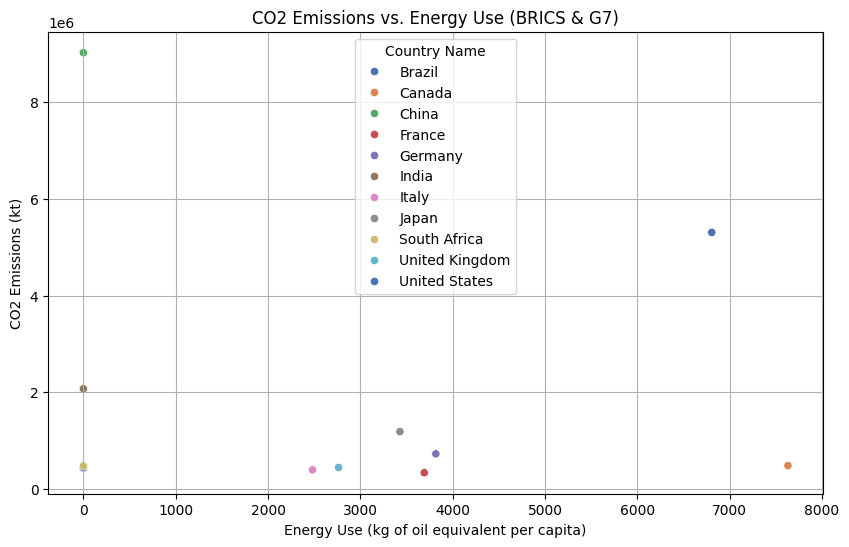

In [ ]:

# 3. Plot CO2 Emissions vs. Energy Use
plt.figure(figsize=(10, 6))
sns.scatterplot(data=latest_data, x='Energy use (kg of oil equivalent per capita)', y='CO2 (kt)', hue='Country Name', palette='deep')
plt.title('CO2 Emissions vs. Energy Use (BRICS & G7)')
plt.xlabel('Energy Use (kg of oil equivalent per capita)')
plt.ylabel('CO2 Emissions (kt)')
plt.grid()
plt.show()

